In [116]:
#@title
import pandas as pd
from google.colab import files
import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
#https://overcoder.net/q/47263/%D0%BD%D0%B0%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D0%B5-matplotlib-inline
import seaborn as sns #Seaborn is another powerful visualization library for Python
from scipy import stats

In [117]:
path = "https://raw.githubusercontent.com/borisgarbuzov/Canadapost/master/data/"
file1 = "Canada_Post_2019.csv"
file2 = "Canada_Post_2018_auto_long.csv"
file3 = "Canada_Post_2017_auto_long.csv"
file4 = "Canada_Post_united_values.csv"
file5 = "Canada_Post_events.csv"

In [118]:
df_2017 = pd.read_csv(path+file3,sep=";")
df_2017

,Row,Column1,Column,Value
0,2017.0,1.0,agulhas,83.0
1,2017.0,1.0,airline,11.0
2,2017.0,1.0,allover,365.0
3,2017.0,1.0,amenity,21.0
4,2017.0,1.0,anchovy,74.0
...,...,...,...,...
5402,2018.0,1.0,trismus,9.0
5403,2018.0,1.0,twinned,149.0
5404,2018.0,1.0,vistula,3.0
5405,2018.0,1.0,woodser,2876.0


In [119]:
df_2017 = df_2017.rename(columns={"Row":"Year", "Column":"Customer", "Value":"Volume", "Column1":"Week_Number"})

In [120]:
#Old Groups 1
customer_df_2017 = df_2017["Customer"].unique().tolist()

dict_df_2017 = {}
for customer in customer_df_2017:
  dict_df_2017[customer] = 0


for key in dict_df_2017:
  x = df_2017.loc[df_2017["Customer"] == key]
  sum_of_category = sum(x["Volume"])
  dict_df_2017[key] += sum_of_category

In [121]:
#Old Groups 2 for df_2017
for  key, value in dict_df_2017.items():
 #print()
  if dict_df_2017[key] < 10000:
    dict_df_2017[key] = "Small"
  elif dict_df_2017[key] >=10000 and dict_df_2017[key] <= 500000:
    dict_df_2017[key] = "Medium"
  else:
    dict_df_2017[key] = "Large"

df_2017.head()    

,Year,Week_Number,Customer,Volume
0,2017.0,1.0,agulhas,83.0
1,2017.0,1.0,airline,11.0
2,2017.0,1.0,allover,365.0
3,2017.0,1.0,amenity,21.0
4,2017.0,1.0,anchovy,74.0


In [122]:
df_2017["Groups_2017"] = df_2017["Customer"].map(dict_df_2017)

In [123]:
df_2017

,Year,Week_Number,Customer,Volume,Groups_2017
0,2017.0,1.0,agulhas,83.0,Small
1,2017.0,1.0,airline,11.0,Small
2,2017.0,1.0,allover,365.0,Medium
3,2017.0,1.0,amenity,21.0,Small
4,2017.0,1.0,anchovy,74.0,Small
...,...,...,...,...,...
5402,2018.0,1.0,trismus,9.0,Small
5403,2018.0,1.0,twinned,149.0,Small
5404,2018.0,1.0,vistula,3.0,Medium
5405,2018.0,1.0,woodser,2876.0,Medium


In [124]:
#again NaN
for column in df_2017.columns:
  df_2017[column]=df_2017[column].fillna(value = df_2017[column].mode()[0])

In [125]:
df_united_values = pd.read_csv(path+file4,sep=";")

In [126]:
df_united_values.head(5)

,Row,Column1,Column,Value
0,2017,1,agulhas,83
1,2017,1,airline,11
2,2017,1,allover,365
3,2017,1,amenity,21
4,2017,1,anchovy,74


In [127]:
df_united_values = df_united_values.rename(columns={"Row":"Year", "Column":"Customer", "Value":"Volume", "Column1":"Week_Number"})
df_united_values.head()

,Year,Week_Number,Customer,Volume
0,2017,1,agulhas,83
1,2017,1,airline,11
2,2017,1,allover,365
3,2017,1,amenity,21
4,2017,1,anchovy,74


In [128]:
# File was without colnames...
colnames=['Year', 'Week_Number', 'Customer', 'Volume', "Event1", "Event2"] 
df_events = pd.read_csv(path+file5,sep=";", names = colnames, header=None)
df_events

,Year,Week_Number,Customer,Volume,Event1,Event2
0,2017,1,agulhas,83,NaN,NaN
1,2017,2,agulhas,98,NaN,NaN
2,2017,3,agulhas,57,NaN,NaN
3,2017,4,agulhas,127,NaN,NaN
4,2017,5,agulhas,121,NaN,NaN
...,...,...,...,...,...,...
12126,2019,13,woodser,1853,NaN,NaN
12127,2019,14,woodser,1618,NaN,NaN
12128,2019,15,woodser,1584,NaN,NaN
12129,2019,16,woodser,1732,NaN,NaN


In [129]:
# It might be not good ta have NaN for futher fork
for column in df_events.columns:
  df_events[column]=df_events[column].fillna(value = 0)
df_events

,Year,Week_Number,Customer,Volume,Event1,Event2
0,2017,1,agulhas,83,0,0
1,2017,2,agulhas,98,0,0
2,2017,3,agulhas,57,0,0
3,2017,4,agulhas,127,0,0
4,2017,5,agulhas,121,0,0
...,...,...,...,...,...,...
12126,2019,13,woodser,1853,0,0
12127,2019,14,woodser,1618,0,0
12128,2019,15,woodser,1584,0,0
12129,2019,16,woodser,1732,0,0


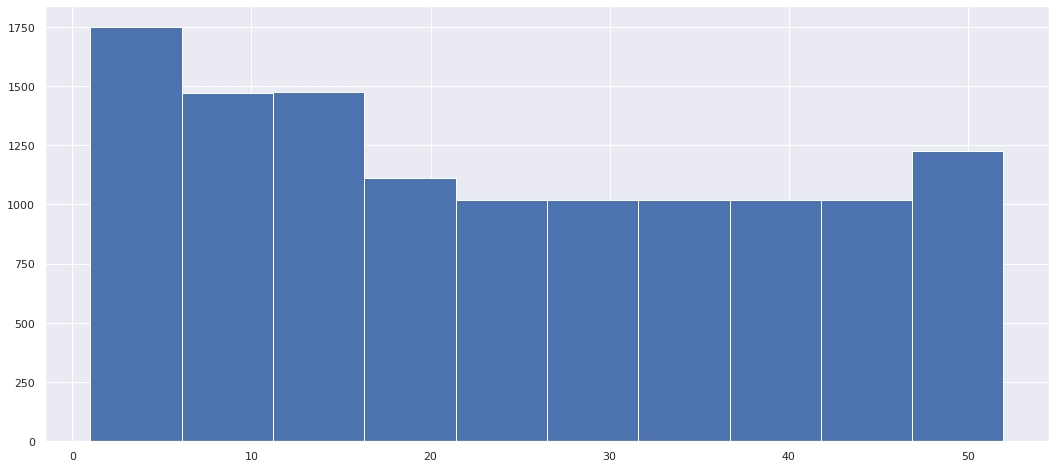

In [130]:
df_united_values["Week_Number"].hist(figsize=(18,8))

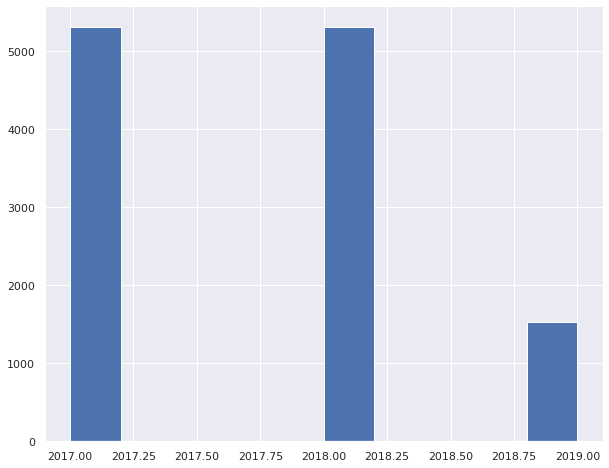

In [131]:
df_united_values["Year"].hist(figsize=(10,8))

In [132]:
# Create a new column, kind of chronological time
# year_week
df_united_values[['Year', 'Week_Number']] = df_united_values[['Year', 'Week_Number']].astype(int).astype(str)
df_united_values["Year_Week"] = df_united_values["Year"] + "-" + df_united_values["Week_Number"]
df_united_values.head(5)

,Year,Week_Number,Customer,Volume,Year_Week
0,2017,1,agulhas,83,2017-1
1,2017,1,airline,11,2017-1
2,2017,1,allover,365,2017-1
3,2017,1,amenity,21,2017-1
4,2017,1,anchovy,74,2017-1


In [133]:
df_united_values

,Year,Week_Number,Customer,Volume,Year_Week
0,2017,1,agulhas,83,2017-1
1,2017,1,airline,11,2017-1
2,2017,1,allover,365,2017-1
3,2017,1,amenity,21,2017-1
4,2017,1,anchovy,74,2017-1
...,...,...,...,...,...
12126,2019,13,woodser,1853,2019-13
12127,2019,14,woodser,1618,2019-14
12128,2019,15,woodser,1584,2019-15
12129,2019,16,woodser,1732,2019-16


In [134]:
temp_df_united_values_2016 = df_united_values.loc[(df_united_values["Year"] == 2016) ]
temp_df_united_values_2016

,Year,Week_Number,Customer,Volume,Year_Week


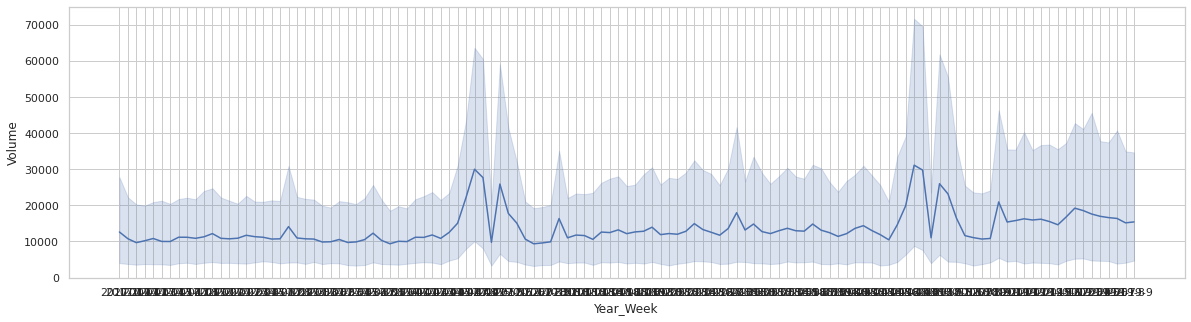

In [135]:
sns.set(style="whitegrid") # does not change if commented
plt.figure(figsize=(20,5))
ax = sns.lineplot(x="Year_Week", y="Volume", data=df_united_values)
# We need the united column "year_week" and we need to plot against it. 
# To have the true chronology




In [136]:
list_data = [df_united_values.loc[:"2017-3", df_united_values.columns.to_list()], df_united_values.loc["2017-4":, df_united_values.columns.to_list()]]
#ax = sns.lineplot(data=list_data)
#sns.set(style="whitegrid") # does not change if commented
#[wide_df.loc[:"2005", "a"], wide_df.loc["2003":, "b"]]
#ax = sns.lineplot(x="Year_Week", y="Volume", data= d)
print(list_data)

[      Year Week_Number Customer  Volume Year_Week
0     2017           1  agulhas      83    2017-1
1     2017           1  airline      11    2017-1
2     2017           1  allover     365    2017-1
3     2017           1  amenity      21    2017-1
4     2017           1  anchovy      74    2017-1
...    ...         ...      ...     ...       ...
2013  2017          20  quamash      66   2017-20
2014  2017          20  recarve   13349   2017-20
2015  2017          20  regosol    1766   2017-20
2016  2017          20  rending      50   2017-20
2017  2017          20  saurian     702   2017-20

[2018 rows x 5 columns],        Year Week_Number Customer  Volume Year_Week
2018   2017          20  scalpel    1128   2017-20
2019   2017          20  scauper      25   2017-20
2020   2017          20  seattle   10769   2017-20
2021   2017          20  service      76   2017-20
2022   2017          20  shaptin   21946   2017-20
...     ...         ...      ...     ...       ...
12126  2019     

In [137]:
#Old Groups 1
customer_df_united_values = df_united_values["Customer"].unique().tolist()

dict_df_united_values = {}
for customer in customer_df_united_values:
  dict_df_united_values[customer] = 0


for key in dict_df_united_values:
  x = df_united_values.loc[df_united_values["Customer"] == key]
  sum_of_category = sum(x["Volume"])
  dict_df_united_values[key] += sum_of_category

In [138]:
#Old Groups 2 for df_united_values
for  key, value in dict_df_united_values.items():
 #print()
  if dict_df_united_values[key] < 10000:
    dict_df_united_values[key] = "Small"
  elif dict_df_united_values[key] >=10000 and dict_df_united_values[key] <= 500000:
    dict_df_united_values[key] = "Medium"
  else:
    dict_df_united_values[key] = "Large"

df_united_values.head()    

,Year,Week_Number,Customer,Volume,Year_Week
0,2017,1,agulhas,83,2017-1
1,2017,1,airline,11,2017-1
2,2017,1,allover,365,2017-1
3,2017,1,amenity,21,2017-1
4,2017,1,anchovy,74,2017-1


In [139]:
df_united_values["Groups"] = df_united_values["Customer"].map(dict_df_2017) 
df_united_values

,Year,Week_Number,Customer,Volume,Year_Week,Groups
0,2017,1,agulhas,83,2017-1,Small
1,2017,1,airline,11,2017-1,Small
2,2017,1,allover,365,2017-1,Medium
3,2017,1,amenity,21,2017-1,Small
4,2017,1,anchovy,74,2017-1,Small
...,...,...,...,...,...,...
12126,2019,13,woodser,1853,2019-13,Medium
12127,2019,14,woodser,1618,2019-14,Medium
12128,2019,15,woodser,1584,2019-15,Medium
12129,2019,16,woodser,1732,2019-16,Medium


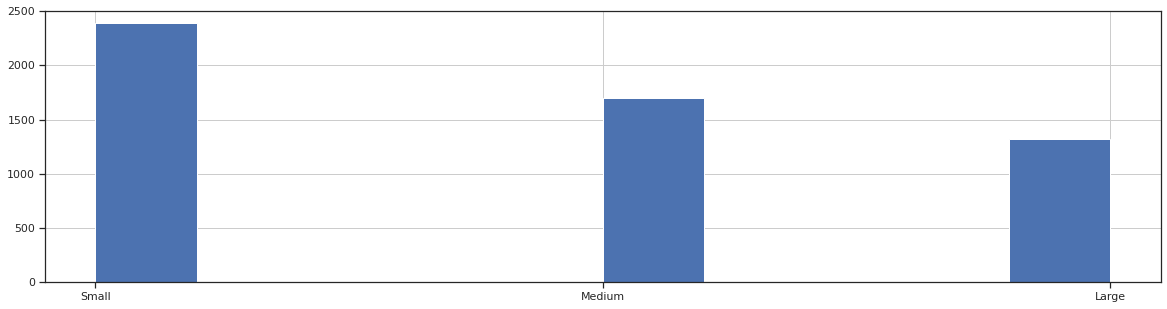

In [140]:
# New visualisation starts here:
sns.set(style="ticks")
plt.figure(figsize=(20,5))
df_2017["Groups_2017"].hist()

In [141]:
temp_df_2017_small = df_2017.loc[df_2017["Groups_2017"] == "Small"]
temp_df_2017_small

,Year,Week_Number,Customer,Volume,Groups_2017
0,2017.0,1.0,agulhas,83.0,Small
1,2017.0,1.0,airline,11.0,Small
3,2017.0,1.0,amenity,21.0,Small
4,2017.0,1.0,anchovy,74.0,Small
6,2017.0,1.0,aplitic,38.0,Small
...,...,...,...,...,...
5397,2018.0,1.0,swaddle,0.0,Small
5401,2018.0,1.0,tripoli,24.0,Small
5402,2018.0,1.0,trismus,9.0,Small
5403,2018.0,1.0,twinned,149.0,Small


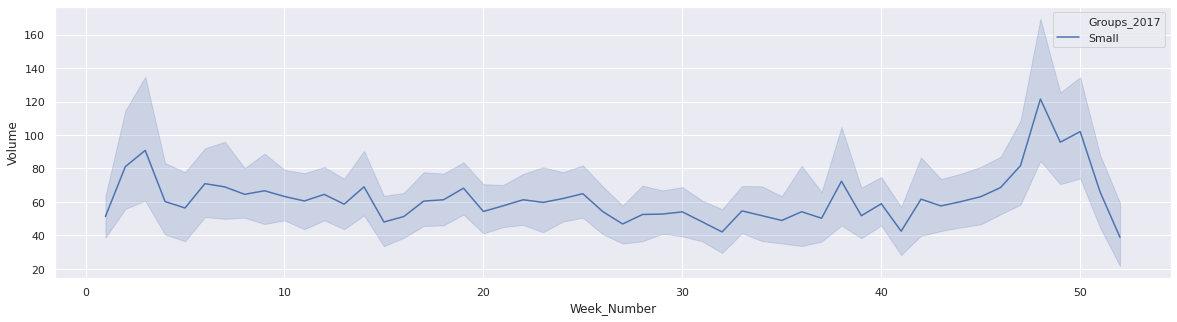

In [142]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,5))
sns.lineplot(x="Week_Number", y="Volume",
             hue="Groups_2017", data=temp_df_2017_small)

In [143]:
temp_df_2017_medium = df_2017.loc[(df_2017["Groups_2017"] == "Medium") & (df_2017["Year"] == 2017)]
temp_df_2017_medium

,Year,Week_Number,Customer,Volume,Groups_2017
2,2017.0,1.0,allover,365.0,Medium
5,2017.0,1.0,angrier,163.0,Medium
8,2017.0,1.0,arrived,77.0,Medium
11,2017.0,1.0,berwick,303.0,Medium
12,2017.0,1.0,birling,84.0,Medium
...,...,...,...,...,...
5292,2017.0,52.0,subhead,260.0,Medium
5293,2017.0,52.0,sullage,0.0,Medium
5296,2017.0,52.0,taboret,416.0,Medium
5302,2017.0,52.0,vistula,20.0,Medium


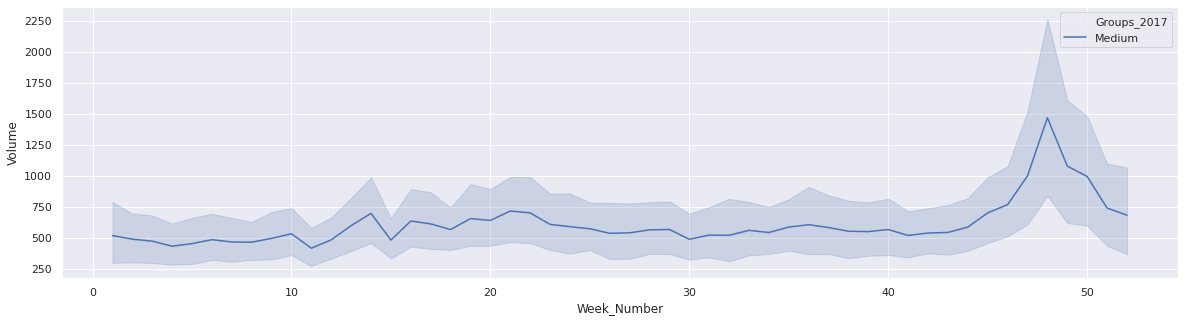

In [144]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,5))
sns.lineplot(x="Week_Number", y="Volume",
             hue="Groups_2017", data=temp_df_2017_medium)

In [145]:
temp_df_2017_large = df_2017.loc[(df_2017["Groups_2017"] == "Large") & (df_2017["Year"] == 2017)]
temp_df_2017_large

,Year,Week_Number,Customer,Volume,Groups_2017
10,2017.0,1.0,benison,18478.0,Large
15,2017.0,1.0,cadorna,17638.0,Large
18,2017.0,1.0,cawdrey,1067.0,Large
22,2017.0,1.0,contemn,5671.0,Large
24,2017.0,1.0,dacryon,6082.0,Large
...,...,...,...,...,...
5278,2017.0,52.0,recarve,5954.0,Large
5284,2017.0,52.0,seattle,15087.0,Large
5286,2017.0,52.0,shaptin,11224.0,Large
5297,2017.0,52.0,toadied,1194.0,Large


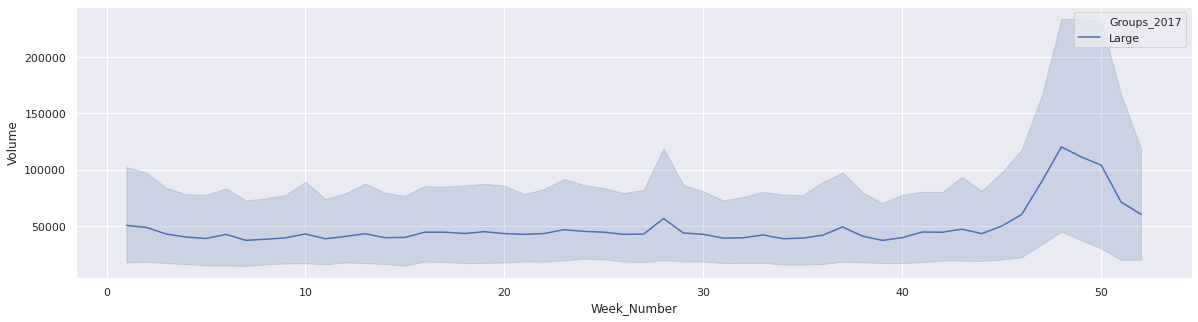

In [146]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,5))
sns.lineplot(x="Week_Number", y="Volume",
             hue="Groups_2017", data=temp_df_2017_large)

In [147]:
df_events

,Year,Week_Number,Customer,Volume,Event1,Event2
0,2017,1,agulhas,83,0,0
1,2017,2,agulhas,98,0,0
2,2017,3,agulhas,57,0,0
3,2017,4,agulhas,127,0,0
4,2017,5,agulhas,121,0,0
...,...,...,...,...,...,...
12126,2019,13,woodser,1853,0,0
12127,2019,14,woodser,1618,0,0
12128,2019,15,woodser,1584,0,0
12129,2019,16,woodser,1732,0,0


In [148]:
df_events["Groups"] = df_events["Customer"].map(dict_df_2017) 
df_events

,Year,Week_Number,Customer,Volume,Event1,Event2,Groups
0,2017,1,agulhas,83,0,0,Small
1,2017,2,agulhas,98,0,0,Small
2,2017,3,agulhas,57,0,0,Small
3,2017,4,agulhas,127,0,0,Small
4,2017,5,agulhas,121,0,0,Small
...,...,...,...,...,...,...,...
12126,2019,13,woodser,1853,0,0,Medium
12127,2019,14,woodser,1618,0,0,Medium
12128,2019,15,woodser,1584,0,0,Medium
12129,2019,16,woodser,1732,0,0,Medium


In [149]:
df_events_prestrike_1 = df_events.loc[(df_events["Event2"] == "prestrike_1")]
df_events_prestrike_1

,Year,Week_Number,Customer,Volume,Event1,Event2,Groups
82,2018,37,agulhas,157,0,prestrike_1,Small
83,2018,38,agulhas,123,0,prestrike_1,Small
203,2018,37,airline,0,0,prestrike_1,Small
204,2018,38,airline,0,0,prestrike_1,Small
320,2018,37,allover,578,0,prestrike_1,Medium
...,...,...,...,...,...,...,...
11854,2018,38,twinned,238,0,prestrike_1,Small
11971,2018,37,vistula,1,0,prestrike_1,Medium
11972,2018,38,vistula,12,0,prestrike_1,Medium
12092,2018,37,woodser,1652,0,prestrike_1,Medium


In [150]:
df_events_strike = df_events.loc[(df_events["Event2"] == "strike")]
df_events_strike

,Year,Week_Number,Customer,Volume,Event1,Event2,Groups
89,2018,43,agulhas,102,0,strike,Small
90,2018,44,agulhas,48,0,strike,Small
91,2018,45,agulhas,80,peek2018,strike,Small
92,2018,46,agulhas,13,peek2018,strike,Small
93,2018,47,agulhas,17,peek2018,strike,Small
...,...,...,...,...,...,...,...
12100,2018,44,woodser,1914,0,strike,Medium
12101,2018,45,woodser,1920,peek2018,strike,Medium
12102,2018,46,woodser,2123,peek2018,strike,Medium
12103,2018,47,woodser,3508,peek2018,strike,Medium


In [151]:
stats.ttest_ind(df_events_prestrike_1["Volume"],df_events_strike["Volume"])

Ttest_indResult(statistic=-0.39374571968900385, pvalue=0.6938718988627632)

In [152]:
df_events_non_strike = df_events.loc[(df_events["Event2"] != "strike")]
df_events_non_strike

,Year,Week_Number,Customer,Volume,Event1,Event2,Groups
0,2017,1,agulhas,83,0,0,Small
1,2017,2,agulhas,98,0,0,Small
2,2017,3,agulhas,57,0,0,Small
3,2017,4,agulhas,127,0,0,Small
4,2017,5,agulhas,121,0,0,Small
...,...,...,...,...,...,...,...
12126,2019,13,woodser,1853,0,0,Medium
12127,2019,14,woodser,1618,0,0,Medium
12128,2019,15,woodser,1584,0,0,Medium
12129,2019,16,woodser,1732,0,0,Medium


In [153]:
test_result = stats.ttest_ind(df_events_non_strike["Volume"],df_events_strike["Volume"])
print("test_result =", test_result)
non_strike_mean = df_events_non_strike["Volume"].mean()
print("non_strike_mean =", non_strike_mean)
strike_mean = df_events_strike["Volume"].mean()
print("strike_mean =", strike_mean)


test_result = Ttest_indResult(statistic=-1.101593608268175, pvalue=0.27066024774827074)
non_strike_mean = 13434.602135602048
strike_mean = 16814.269607843136


In [154]:
df_small_non_strike = df_events_non_strike.loc[(df_events_non_strike["Groups"] == "Small")]
df_small_non_strike

,Year,Week_Number,Customer,Volume,Event1,Event2,Groups
0,2017,1,agulhas,83,0,0,Small
1,2017,2,agulhas,98,0,0,Small
2,2017,3,agulhas,57,0,0,Small
3,2017,4,agulhas,127,0,0,Small
4,2017,5,agulhas,121,0,0,Small
...,...,...,...,...,...,...,...
11884,2019,12,twinned,121,0,0,Small
11885,2019,13,twinned,107,0,0,Small
11886,2019,14,twinned,175,0,0,Small
11887,2019,15,twinned,149,0,0,Small


In [155]:
df_small_strike = df_events_strike.loc[(df_events_strike["Groups"] == "Small")]
df_small_strike

,Year,Week_Number,Customer,Volume,Event1,Event2,Groups
89,2018,43,agulhas,102,0,strike,Small
90,2018,44,agulhas,48,0,strike,Small
91,2018,45,agulhas,80,peek2018,strike,Small
92,2018,46,agulhas,13,peek2018,strike,Small
93,2018,47,agulhas,17,peek2018,strike,Small
...,...,...,...,...,...,...,...
11861,2018,44,twinned,123,0,strike,Small
11862,2018,45,twinned,0,peek2018,strike,Small
11863,2018,46,twinned,0,peek2018,strike,Small
11864,2018,47,twinned,359,peek2018,strike,Small


In [156]:
test_result2 = stats.ttest_ind(df_small_non_strike["Volume"], df_small_strike["Volume"])
test_result2

Ttest_indResult(statistic=1.8069429817830112, pvalue=0.07082814742176234)

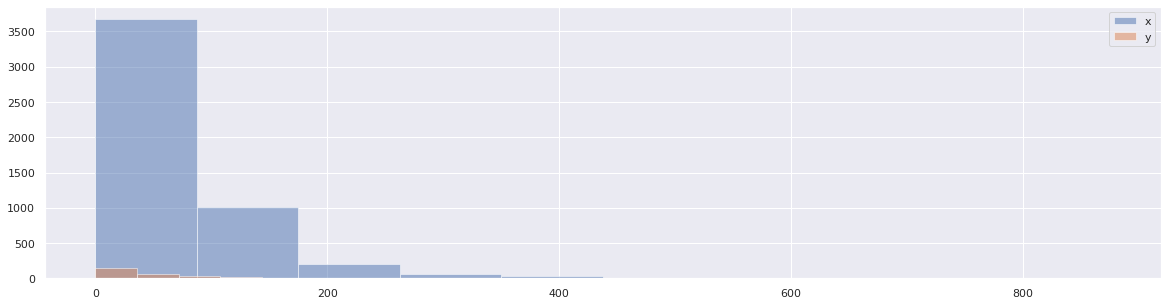

In [157]:
# graph for large
import matplotlib.pyplot as pyplot
x = df_small_non_strike["Volume"]
y = df_small_strike["Volume"]
plt.figure(figsize=(20,5))
pyplot.hist(x, alpha=0.5, label='x')
pyplot.hist(y, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()

In [158]:
df_small_strike_mean = df_small_strike["Volume"].mean()

In [159]:
df_small_non_strike_mean = df_small_non_strike["Volume"].mean()

In [160]:
print("df_small_strike_mean = ", df_small_strike_mean)
print("df_small_non_strike_mean = ", df_small_non_strike_mean)

df_small_strike_mean =  55.611111111111114
df_small_non_strike_mean =  63.92907092907093


In [161]:
df_events_strike["Volume"].max()

1640560

In [162]:
df_events_strike["Volume"].min()

0

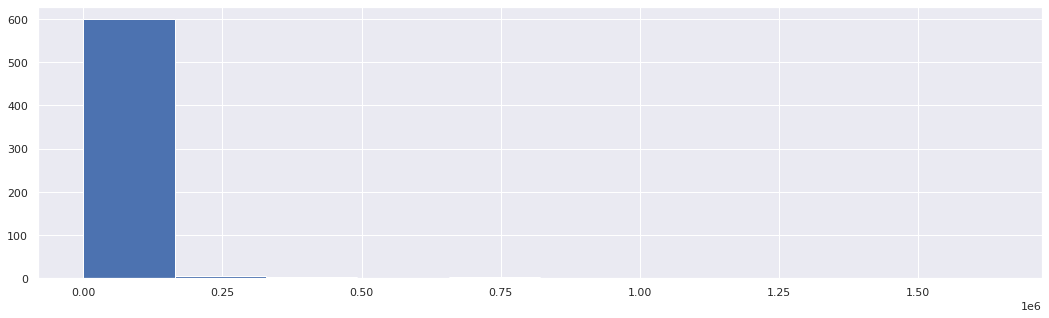

In [163]:
df_events_strike["Volume"].hist(figsize=(18,5))

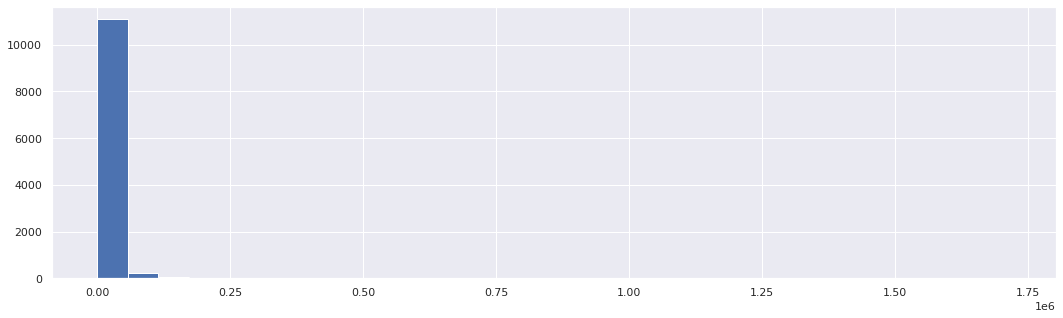

In [164]:
df_events_non_strike["Volume"].hist(figsize=(18,5), bins = 30)

In [165]:
from matplotlib import pyplot

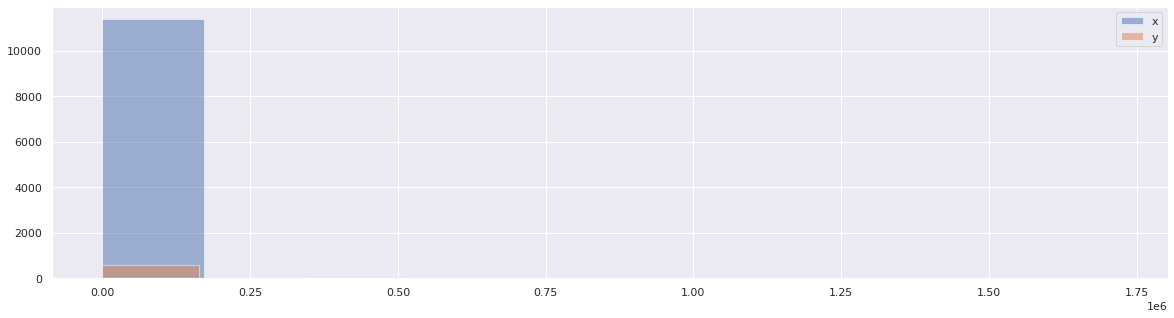

In [166]:
x = df_events_non_strike["Volume"]
y = df_events_strike["Volume"]
plt.figure(figsize=(20,5))
pyplot.hist(x, alpha=0.5, label='x')
pyplot.hist(y, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()

In [167]:
df_large_strike = df_events_strike.loc[(df_events_strike["Groups"] == "Large")]
df_large_strike

,Year,Week_Number,Customer,Volume,Event1,Event2,Groups
1290,2018,43,benison,7534,0,strike,Large
1291,2018,44,benison,7228,0,strike,Large
1292,2018,45,benison,6499,peek2018,strike,Large
1293,2018,46,benison,7513,peek2018,strike,Large
1294,2018,47,benison,10464,peek2018,strike,Large
...,...,...,...,...,...,...,...
11512,2018,44,triduum,21747,0,strike,Large
11513,2018,45,triduum,19426,peek2018,strike,Large
11514,2018,46,triduum,32283,peek2018,strike,Large
11515,2018,47,triduum,55554,peek2018,strike,Large


In [168]:
df_large_non_strike = df_events_non_strike.loc[(df_events_non_strike["Groups"] == "Large")]

In [169]:
#test result for large
test_result3 = stats.ttest_ind(df_large_non_strike["Volume"], df_large_strike["Volume"])
test_result3

Ttest_indResult(statistic=-1.2353737174143746, pvalue=0.21678744761660243)

In [170]:
df_large_non_strike_volume_mean = df_large_non_strike["Volume"].mean()
df_large_strike_volume_mean = df_large_strike["Volume"].mean()
print("df_large_non_strike_volume_mean", df_large_non_strike_volume_mean)
print("df_large_strike_volume_mean", df_large_strike_volume_mean)

df_large_non_strike_volume_mean 52895.753391304344
df_large_strike_volume_mean 67455.73333333334


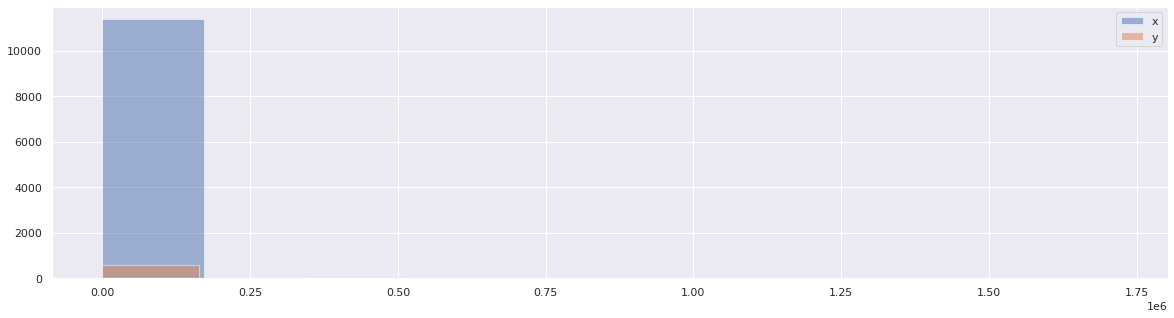

In [171]:
# graph for large
df_large_non_strike_volume = df_large_non_strike["Volume"]
df_large_strike_volume = df_large_strike["Volume"]
plt.figure(figsize=(20,5))
pyplot.hist(x, alpha=0.5, label='x')
pyplot.hist(y, alpha=0.5, label='y')
pyplot.legend(loc='upper right')
pyplot.show()

In [172]:
df_medium_strike = df_events_strike.loc[(df_events_strike["Groups"] == "Medium")]
df_large_strike

,Year,Week_Number,Customer,Volume,Event1,Event2,Groups
1290,2018,43,benison,7534,0,strike,Large
1291,2018,44,benison,7228,0,strike,Large
1292,2018,45,benison,6499,peek2018,strike,Large
1293,2018,46,benison,7513,peek2018,strike,Large
1294,2018,47,benison,10464,peek2018,strike,Large
...,...,...,...,...,...,...,...
11512,2018,44,triduum,21747,0,strike,Large
11513,2018,45,triduum,19426,peek2018,strike,Large
11514,2018,46,triduum,32283,peek2018,strike,Large
11515,2018,47,triduum,55554,peek2018,strike,Large


In [173]:
df_medium_non_strike = df_events_non_strike.loc[(df_events_non_strike["Groups"] == "Medium")]

In [174]:
#test result for medium
test_result4 = stats.ttest_ind(df_medium_non_strike["Volume"], df_medium_strike["Volume"])
test_result4

Ttest_indResult(statistic=-2.5179656793122995, pvalue=0.011844128908918481)

In [175]:
# means for medium
# it can be seen that mean of volume during strike is higher than 
df_medium_non_strike_volume_mean = df_medium_non_strike["Volume"].mean()
df_medium_strike_volume_mean = df_medium_strike["Volume"].mean()
print("df_medium_non_strike_volume_mean", df_medium_non_strike_volume_mean)
print("df_medium_strike_volume_mean", df_medium_strike_volume_mean)

df_medium_non_strike_volume_mean 645.2896189950304
df_medium_strike_volume_mean 817.4895833333334


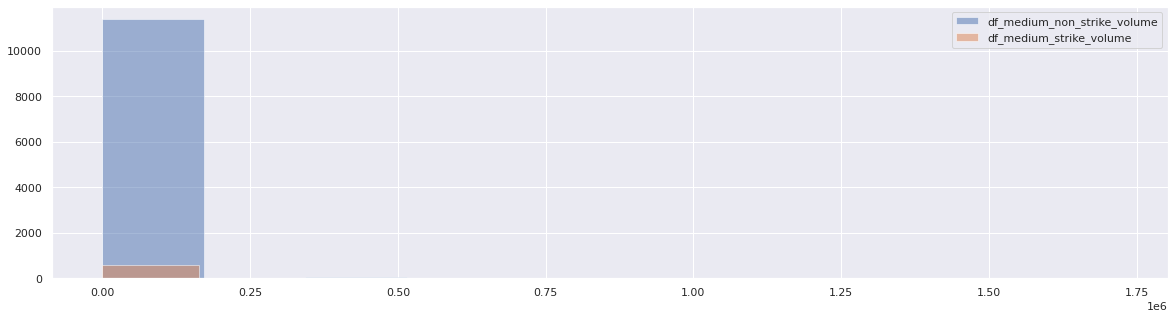

In [176]:
# graph for medium
df_medium_non_strike_volume = df_medium_non_strike["Volume"]
df_medium_strike_volume = df_medium_strike["Volume"]
plt.figure(figsize=(20,5))
pyplot.hist(x, alpha=0.5, label='df_medium_non_strike_volume')
pyplot.hist(y, alpha=0.5, label='df_medium_strike_volume')
pyplot.legend(loc='upper right')
pyplot.show()

In [177]:
df_events

,Year,Week_Number,Customer,Volume,Event1,Event2,Groups
0,2017,1,agulhas,83,0,0,Small
1,2017,2,agulhas,98,0,0,Small
2,2017,3,agulhas,57,0,0,Small
3,2017,4,agulhas,127,0,0,Small
4,2017,5,agulhas,121,0,0,Small
...,...,...,...,...,...,...,...
12126,2019,13,woodser,1853,0,0,Medium
12127,2019,14,woodser,1618,0,0,Medium
12128,2019,15,woodser,1584,0,0,Medium
12129,2019,16,woodser,1732,0,0,Medium


In [178]:
list_of_strike_weeks =  df_events_strike["Week_Number"].unique().tolist()
list_of_strike_weeks

[43, 44, 45, 46, 47, 48]

In [179]:
df_prestrike_2017_byweeks = df_events.loc[(df_events["Week_Number"].isin(list_of_strike_weeks)) & (df_events["Year"]==2017) ]
df_prestrike_2017_byweeks

,Year,Week_Number,Customer,Volume,Event1,Event2,Groups
42,2017,43,agulhas,118,0,0,Small
43,2017,44,agulhas,109,0,0,Small
44,2017,45,agulhas,116,0,0,Small
45,2017,46,agulhas,182,0,0,Small
46,2017,47,agulhas,140,peek2017,0,Small
...,...,...,...,...,...,...,...
12053,2017,44,woodser,1872,0,0,Medium
12054,2017,45,woodser,2212,0,0,Medium
12055,2017,46,woodser,2424,0,0,Medium
12056,2017,47,woodser,3357,peek2017,0,Medium


In [180]:
# Testing the influence of the strike
df_events_strike_volume_mean = df_events_strike["Volume"].mean()
df_prestrike_2017_byweeks_volume_mean = df_prestrike_2017_byweeks["Volume"].mean()
print("df_events_strike_volume_mean = ", df_events_strike_volume_mean)
print("df_prestrike_2017_byweeks_volume_mean = ", df_prestrike_2017_byweeks_volume_mean)

df_events_strike_volume_mean =  16814.269607843136
df_prestrike_2017_byweeks_volume_mean =  17057.43137254902


In [181]:
#test result for Strike prestrike(2017)
test_result5 = stats.ttest_ind(df_events_strike["Volume"], df_prestrike_2017_byweeks["Volume"])
test_result5
# Overall, strike reduced the number of parcels, but very insignificantly

Ttest_indResult(statistic=-0.047381742569375364, pvalue=0.962216722147955)

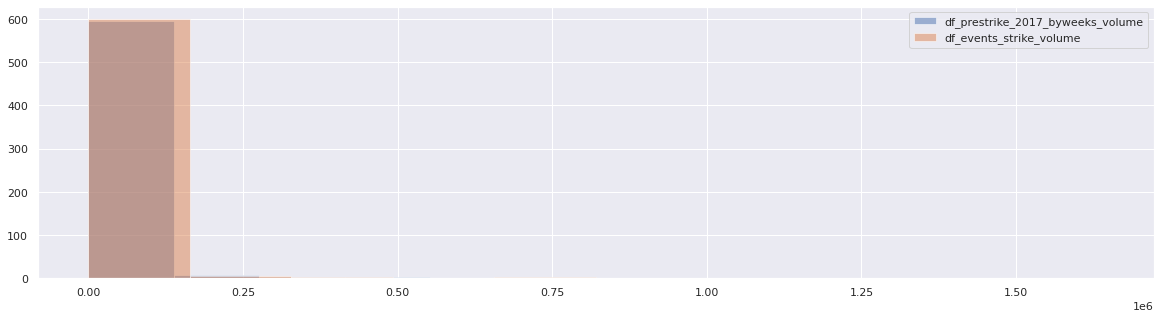

In [182]:
# graph overall
df_prestrike_2017_byweeks_volume = df_prestrike_2017_byweeks["Volume"]
df_events_strike_volume = df_events_strike["Volume"]
plt.figure(figsize=(20,5))
pyplot.hist(df_prestrike_2017_byweeks_volume, alpha=0.5, label='df_prestrike_2017_byweeks_volume')
pyplot.hist(df_events_strike_volume, alpha=0.5, label='df_events_strike_volume')
pyplot.legend(loc='upper right')
pyplot.show()

In [183]:
# subset all 3 groups by size
df_small_prestrike_2017_byweeks = df_prestrike_2017_byweeks.loc[(df_prestrike_2017_byweeks["Groups"] == "Small" )]
df_medium_prestrike_2017_byweeks = df_prestrike_2017_byweeks.loc[(df_prestrike_2017_byweeks["Groups"] == "Medium" )]
df_large_prestrike_2017_byweeks = df_prestrike_2017_byweeks.loc[(df_prestrike_2017_byweeks["Groups"] == "Large" )]

In [184]:
df_small_strike_mean = df_small_strike["Volume"].mean()
df_small_prestrike_2017_byweeks_mean = df_small_prestrike_2017_byweeks["Volume"].mean()
print("df_small_strike_mean = ", df_small_strike_mean)
print("df_small_prestrike_2017_byweeks_mean = ", df_small_prestrike_2017_byweeks_mean)

df_small_strike_mean =  55.611111111111114
df_small_prestrike_2017_byweeks_mean =  75.46666666666667


In [185]:
df_small_prestrike_2017_byweeks

,Year,Week_Number,Customer,Volume,Event1,Event2,Groups
42,2017,43,agulhas,118,0,0,Small
43,2017,44,agulhas,109,0,0,Small
44,2017,45,agulhas,116,0,0,Small
45,2017,46,agulhas,182,0,0,Small
46,2017,47,agulhas,140,peek2017,0,Small
...,...,...,...,...,...,...,...
11814,2017,44,twinned,75,0,0,Small
11815,2017,45,twinned,145,0,0,Small
11816,2017,46,twinned,118,0,0,Small
11817,2017,47,twinned,108,peek2017,0,Small


In [186]:
#test result for Strike prestrike SMALL (2017)
test_result6 = stats.ttest_ind(df_small_strike["Volume"], df_small_prestrike_2017_byweeks["Volume"])
test_result6
# The small customers significantly reduced their number of parcels

Ttest_indResult(statistic=-2.936986420084576, pvalue=0.0034561139727879646)

In [187]:
df_medium_strike_mean = df_medium_strike["Volume"].mean()
df_medium_prestrike_2017_byweeks_mean = df_medium_prestrike_2017_byweeks["Volume"].mean()
print("df_medium_strike_mean = ", df_medium_strike_mean)
print("df_medium_prestrike_2017_byweeks_mean = ", df_medium_prestrike_2017_byweeks_mean)

df_medium_strike_mean =  817.4895833333334
df_medium_prestrike_2017_byweeks_mean =  843.5625


In [188]:
#test result for Strike prestrike MEDIUM (2017)
test_result7 = stats.ttest_ind(df_medium_strike["Volume"], df_medium_prestrike_2017_byweeks["Volume"])
test_result7
# Just like overall, the medium customers reduced their number of parcels,
# but very insignificantly. 

Ttest_indResult(statistic=-0.19260777621179626, pvalue=0.8473685092108073)

In [189]:
df_large_strike_mean = df_large_strike["Volume"].mean()
df_large_prestrike_2017_byweeks_mean = df_large_prestrike_2017_byweeks["Volume"].mean()
print("df_large_strike_mean = ", df_large_strike_mean)
print("df_large_prestrike_2017_byweeks_mean = ", df_large_prestrike_2017_byweeks_mean)

df_large_strike_mean =  67455.73333333334
df_large_prestrike_2017_byweeks_mean =  68378.72


In [190]:
#test result for Strike prestrike LARGE (2017)
test_result8 = stats.ttest_ind(df_large_strike["Volume"], df_large_prestrike_2017_byweeks["Volume"])
test_result8
# Just like overall and medium, the large customers reduced their number of parcels,
# but very insignificantly. 

Ttest_indResult(statistic=-0.04647656126037419, pvalue=0.96296154554833)

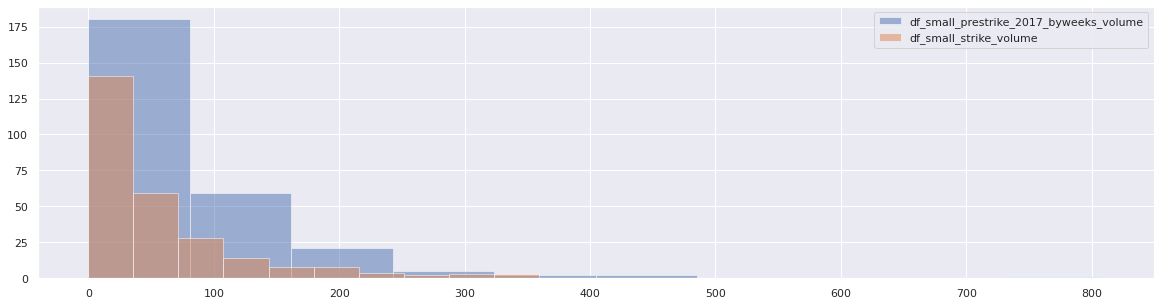

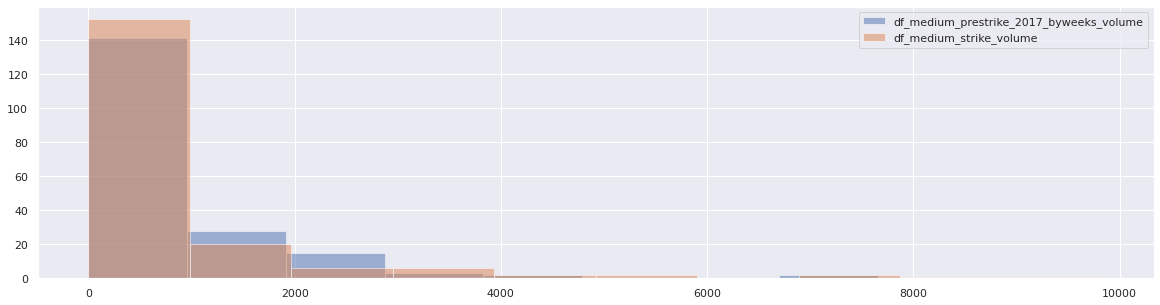

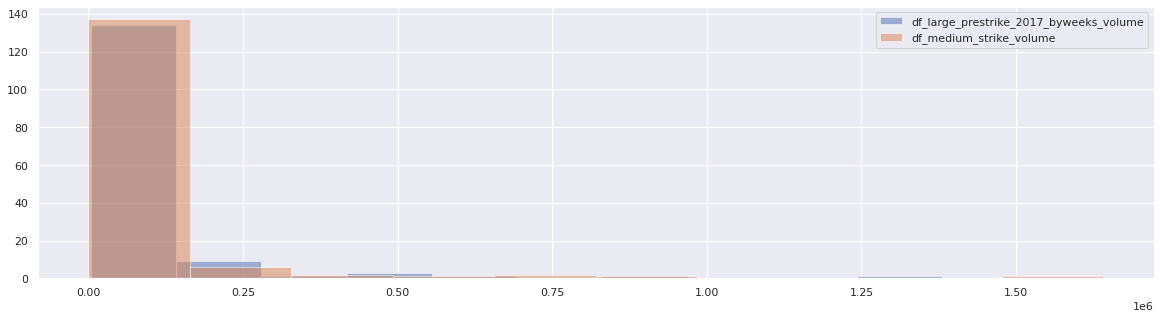

In [191]:
# graph for small
df_small_prestrike_2017_byweeks_volume = df_small_prestrike_2017_byweeks["Volume"]
df_small_strike_volume = df_small_strike["Volume"]
plt.figure(figsize=(20,5))
pyplot.hist(df_small_prestrike_2017_byweeks_volume, alpha=0.5, label='df_small_prestrike_2017_byweeks_volume')
pyplot.hist(df_small_strike_volume, alpha=0.5, label='df_small_strike_volume')
pyplot.legend(loc='upper right')
# graph for medium
df_medium_prestrike_2017_byweeks_volume = df_medium_prestrike_2017_byweeks["Volume"]
df_medium_strike_volume = df_medium_strike["Volume"]
plt.figure(figsize=(20,5))
pyplot.hist(df_medium_prestrike_2017_byweeks_volume, alpha=0.5, label='df_medium_prestrike_2017_byweeks_volume')
pyplot.hist(df_medium_strike_volume, alpha=0.5, label='df_medium_strike_volume')
pyplot.legend(loc='upper right')
# graph for large
df_large_prestrike_2017_byweeks_volume = df_large_prestrike_2017_byweeks["Volume"]
df_large_strike_volume = df_large_strike["Volume"]
plt.figure(figsize=(20,5))
pyplot.hist(df_large_prestrike_2017_byweeks_volume, alpha=0.5, label='df_large_prestrike_2017_byweeks_volume')
pyplot.hist(df_large_strike_volume, alpha=0.5, label='df_medium_strike_volume')
pyplot.legend(loc='upper right')

pyplot.show()

In [192]:

list_of_weeks_2017 = [i for i in range(49,53)]
list_of_weeks_2018 = [i for i in range(1,18)]
print(list_of_weeks_2017)
print(list_of_weeks_2018)

[49, 50, 51, 52]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


In [193]:
list_of_weeks_2017 = [i for i in range(49,52)]
list_of_weeks_2018 = [i for i in range(1,17)]
df_before_strike = df_events[((df_events['Week_Number'].isin(list_of_weeks_2017)) & (df_events['Year']==2017)) | 
               ((df_events['Week_Number'].isin(list_of_weeks_2018)) & (df_events['Year']==2018))]
df_before_strike

,Year,Week_Number,Customer,Volume,Event1,Event2,Groups
48,2017,49,agulhas,74,0,0,Small
49,2017,50,agulhas,106,0,0,Small
50,2017,51,agulhas,51,0,0,Small
52,2018,1,agulhas,87,0,0,Small
53,2018,10,agulhas,106,0,0,Small
...,...,...,...,...,...,...,...
12106,2018,5,woodser,2474,0,0,Medium
12110,2018,6,woodser,2595,0,0,Medium
12111,2018,7,woodser,2034,0,0,Medium
12112,2018,8,woodser,1858,0,0,Medium


In [194]:
df_after_strike = df_events[((df_events['Week_Number'].isin(list_of_weeks_2017)) & (df_events['Year']==2018)) | 
               ((df_events['Week_Number'].isin(list_of_weeks_2018)) & (df_events['Year']==2019))]
df_after_strike

,Year,Week_Number,Customer,Volume,Event1,Event2,Groups
95,2018,49,agulhas,41,peek2018,0,Small
97,2018,50,agulhas,113,peek2018,0,Small
98,2018,51,agulhas,42,peek2018,0,Small
104,2019,1,agulhas,71,peek2018,0,Small
105,2019,2,agulhas,123,peek2018,0,Small
...,...,...,...,...,...,...,...
12125,2019,12,woodser,1821,0,0,Medium
12126,2019,13,woodser,1853,0,0,Medium
12127,2019,14,woodser,1618,0,0,Medium
12128,2019,15,woodser,1584,0,0,Medium


In [195]:
df_before_strike_mean = df_before_strike["Volume"].mean()
df_after_strike_mean = df_after_strike["Volume"].mean()
print("df_before_strike_mean = ", df_before_strike_mean)
print("df_after_strike_mean = ", df_after_strike_mean)

df_before_strike_mean =  13918.105779153766
df_after_strike_mean =  18313.42544617156


In [196]:
#test result for Strike prestrike LARGE (2017)
test_result_pre_after_strike = stats.ttest_ind(df_before_strike["Volume"], df_after_strike["Volume"])
test_result_pre_after_strike

Ttest_indResult(statistic=-1.4499456924669467, pvalue=0.1471590441287624)

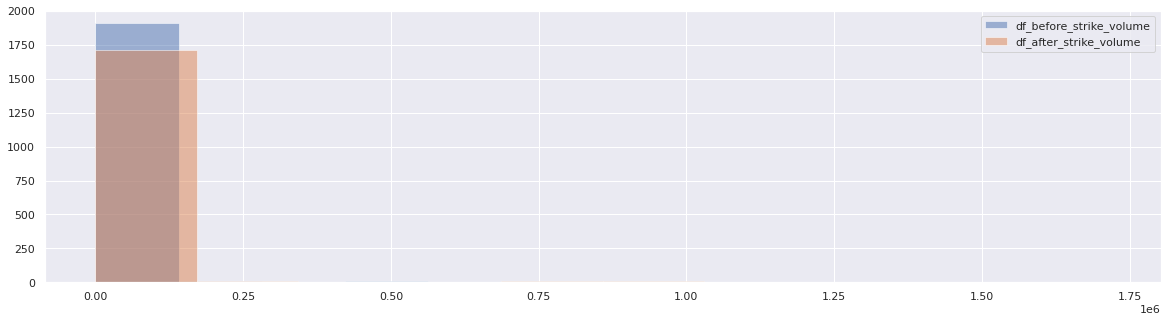

In [197]:
df_before_strike_volume = df_before_strike["Volume"]
df_after_strike_volume = df_after_strike["Volume"]
plt.figure(figsize=(20,5))
pyplot.hist(df_before_strike_volume, alpha=0.5, label='df_before_strike_volume')
pyplot.hist(df_after_strike_volume, alpha=0.5, label='df_after_strike_volume')
pyplot.legend(loc='upper right')
pyplot.show()

In [198]:
# Creating groups for df_before_strike
df_small_before_strike = df_before_strike.loc[(df_before_strike["Groups"] == "Small" )]
df_medium_before_strike = df_before_strike.loc[(df_before_strike["Groups"] == "Medium" )]
df_large_before_strike = df_before_strike.loc[(df_before_strike["Groups"] == "Large" )]

In [199]:
# Creating groups for df_after_strike
df_small_after_strike = df_after_strike.loc[(df_after_strike["Groups"] == "Small" )]
df_medium_after_strike = df_after_strike.loc[(df_after_strike["Groups"] == "Medium" )]
df_large_after_strike = df_after_strike.loc[(df_after_strike["Groups"] == "Large" )]

In [200]:
#Creating all the mean values for groups
df_small_before_strike_mean = df_small_before_strike["Volume"].mean()
df_medium_before_strike_mean = df_medium_before_strike["Volume"].mean()
df_large_before_strike_mean = df_large_before_strike["Volume"].mean()
df_small_after_strike_mean = df_small_after_strike["Volume"].mean()
df_medium_after_strike_mean = df_medium_after_strike["Volume"].mean()
df_large_after_strike_mean = df_large_after_strike["Volume"].mean()


In [201]:
print("df_small_before_strike_mean = ",df_small_before_strike_mean)
print("df_small_after_strike_mean = ", df_small_after_strike_mean)

df_small_before_strike_mean =  67.49707602339181
df_small_after_strike_mean =  75.25108225108225


In [202]:
#test result for Strike prestrike SMALL
test_result_small_pre_after_strike = stats.ttest_ind(df_small_before_strike["Volume"], df_small_after_strike["Volume"])
test_result_small_pre_after_strike

Ttest_indResult(statistic=-1.9145247368924465, pvalue=0.055737545043341837)

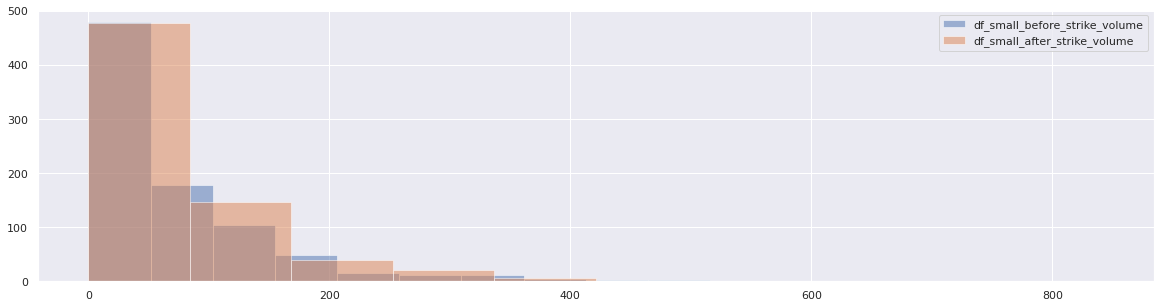

In [203]:
df_small_before_strike_volume = df_small_before_strike["Volume"]
df_small_after_strike_volume = df_small_after_strike["Volume"]
plt.figure(figsize=(20,5))
pyplot.hist(df_small_before_strike_volume, alpha=0.5, label='df_small_before_strike_volume')
pyplot.hist(df_small_after_strike_volume, alpha=0.5, label='df_small_after_strike_volume')
pyplot.legend(loc='upper right')

pyplot.show()

In [204]:
print("df_medium_before_strike_mean = ",df_medium_before_strike_mean)
print("df_meium_after_strike_mean = ", df_medium_after_strike_mean)

df_medium_before_strike_mean =  678.53125
df_meium_after_strike_mean =  714.4195298372514


In [205]:
#test result for Strike prestrike MEDIUM
test_result_medium_pre_after_strike = stats.ttest_ind(df_medium_before_strike["Volume"], df_medium_after_strike["Volume"])
test_result_medium_pre_after_strike

Ttest_indResult(statistic=-0.6135534016867631, pvalue=0.5396308766257327)

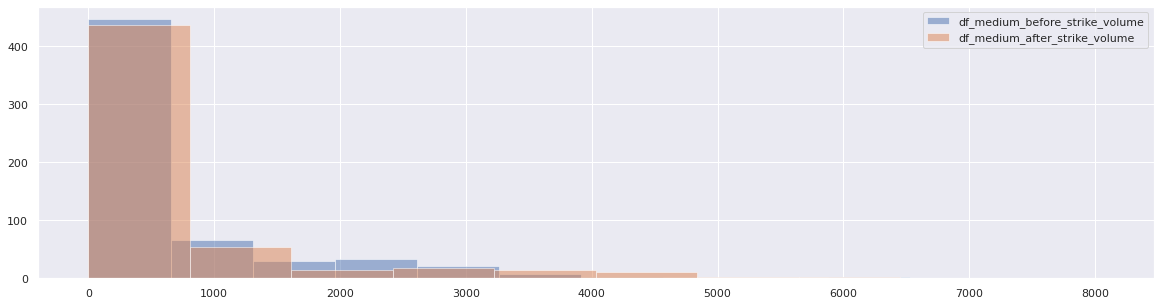

In [206]:
df_medium_before_strike_volume = df_medium_before_strike["Volume"]
df_medium_after_strike_volume = df_medium_after_strike["Volume"]
plt.figure(figsize=(20,5))
pyplot.hist(df_medium_before_strike_volume, alpha=0.5, label='df_medium_before_strike_volume')
pyplot.hist(df_medium_after_strike_volume, alpha=0.5, label='df_medium_after_strike_volume')
pyplot.legend(loc='upper right')

pyplot.show()

In [207]:
print("df_large_before_strike_mean = ",df_large_before_strike_mean)
print("df_large_after_strike_mean = ", df_large_after_strike_mean)

df_large_before_strike_mean =  55795.85684210526
df_large_after_strike_mean =  65986.50736842105


In [208]:
#test result for Strike prestrike Large
test_result_large_pre_after_strike = stats.ttest_ind(df_large_before_strike["Volume"], df_large_after_strike["Volume"])
test_result_large_pre_after_strike

Ttest_indResult(statistic=-0.908542272310762, pvalue=0.3638226966687237)

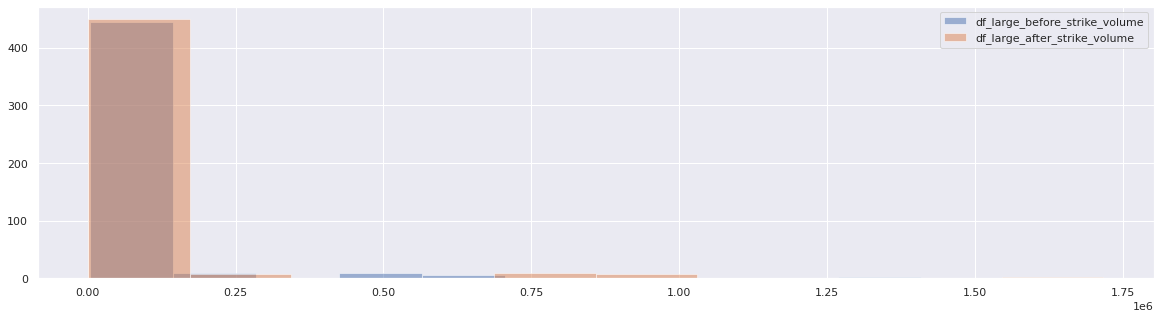

In [209]:
df_large_before_strike_volume = df_large_before_strike["Volume"]
df_large_after_strike_volume = df_large_after_strike["Volume"]
plt.figure(figsize=(20,5))
pyplot.hist(df_large_before_strike_volume, alpha=0.5, label='df_large_before_strike_volume')
pyplot.hist(df_large_after_strike_volume, alpha=0.5, label='df_large_after_strike_volume')
pyplot.legend(loc='upper right')

pyplot.show()

In [210]:
media_week_numer = 37
union_voted_week_number = 39

In [211]:
df_media_2018 = df_events[((df_events['Week_Number'] == 37) & (df_events['Year']==2018))]
df_media_2017 = df_events[((df_events['Week_Number'] == 37) & (df_events['Year']==2017))]
df_union_voted_2018 = df_events[((df_events['Week_Number'] == 39) & (df_events['Year']==2018))]
df_union_voted_2017 = df_events[((df_events['Week_Number'] == 39) & (df_events['Year']==2017))]

In [212]:
df_media_2018_mean = df_media_2018["Volume"].mean()
df_media_2017_mean = df_media_2017["Volume"].mean()
print("df_media_2018_mean = ", df_media_2018_mean)
print("df_media_2017_mean = ", df_media_2017_mean)

df_media_2018_mean =  14808.549019607843
df_media_2017_mean =  12284.519607843138


In [213]:
# T-test for media
test_result_media = stats.ttest_ind(df_media_2018["Volume"], df_media_2017["Volume"])
test_result_media

Ttest_indResult(statistic=0.2640578174466393, pvalue=0.7920045671424991)

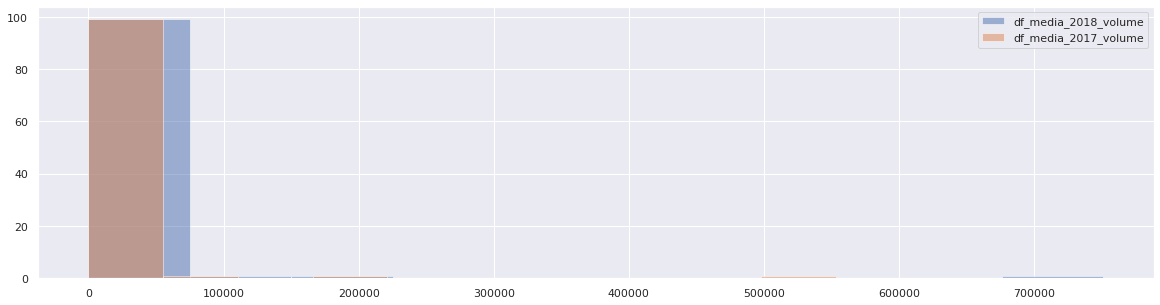

In [214]:
df_media_2018_volume = df_media_2018["Volume"]
df_media_2017_volume = df_media_2017["Volume"]
plt.figure(figsize=(20,5))
pyplot.hist(df_media_2018_volume, alpha=0.5, label='df_media_2018_volume')
pyplot.hist(df_media_2017_volume, alpha=0.5, label='df_media_2017_volume')
pyplot.legend(loc='upper right')

pyplot.show()

In [215]:
df_union_voted_2018_mean = df_union_voted_2018["Volume"].mean()
df_union_voted_2017_mean = df_union_voted_2017["Volume"].mean()
print("df_union_voted_2018_mean = ", df_union_voted_2018_mean)
print("df_union_voted_2017_mean = ", df_union_voted_2017_mean)

df_union_voted_2018_mean =  12414.43137254902
df_union_voted_2017_mean =  9352.754901960785


In [216]:
# T-test for union voted event
test_result_union_voted = stats.ttest_ind(df_union_voted_2018["Volume"], df_union_voted_2017["Volume"])
test_result_union_voted

Ttest_indResult(statistic=0.4040631876087712, pvalue=0.68659371444835)

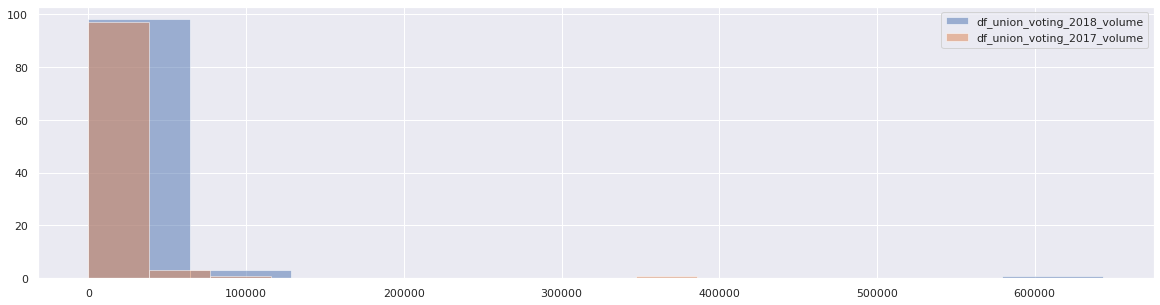

In [217]:
df_union_voted_2018_volume = df_union_voted_2018["Volume"]
df_union_voted_2017_volume = df_union_voted_2017["Volume"]
plt.figure(figsize=(20,5))
pyplot.hist(df_union_voted_2018_volume, alpha=0.5, label='df_union_voting_2018_volume')
pyplot.hist(df_union_voted_2017_volume, alpha=0.5, label='df_union_voting_2017_volume')
pyplot.legend(loc='upper right')

pyplot.show()